# mnist-deep-learning

Use the "Run" button to execute the code.

In [ ]:
#!pip install tensorflow   # We can run this to install tensorflow

In [1]:
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist  # Dataset is in built with the tensorflow
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal

In [2]:
print(tf.__version__)

2.5.0


In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

# We can use this code block for pltting

In [4]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


In [6]:
# If we observe the input shape, its of 2 dimensional vector
# For each image we have a (28*28) vector
# We will convert the (28*28) vector into single dimensional vector of 1 * 784   (3D to 2D)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
# After converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of testing examples : 10000 and each image is of shape (784)


In [8]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [9]:
# If we observe the above matrix each cell is having a value between 0-255
# Before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255    
X_test = X_test/255    

# The lowest value is (white=0) and highest is (black=255), we need to scale between 0 to 1
# Scaling the test data in range 0 to 1

In [10]:
# Example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
# Here we are having a class number for each image
print("Class label of first image :", y_train[0])

# Need to convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# This conversion is needed for MLPs 
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

Y_train = utils.to_categorical(y_train, 10) 
Y_test = utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation 

In [13]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

### Precision, recall and F1 score calculation :

In [14]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))    # Formula for F1 score calculation

# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

In [15]:
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy', f1_m])
history = model.fit(X_train, Y_train, steps_per_epoch=500, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Epoch 1/20
500/500 [==============================] - 5s 4ms/step - loss: 1.2404 - accuracy: 0.7150 - f1_m: 0.3710 - val_loss: 0.7802 - val_accuracy: 0.8415 - val_f1_m: 0.6988
Epoch 2/20
500/500 [==============================] - 2s 3ms/step - loss: 0.6921 - accuracy: 0.8469 - f1_m: 0.7677 - val_loss: 0.5880 - val_accuracy: 0.8659 - val_f1_m: 0.8146
Epoch 3/20
500/500 [==============================] - 2s 3ms/step - loss: 0.5710 - accuracy: 0.8631 - f1_m: 0.8291 - val_loss: 0.5117 - val_accuracy: 0.8771 - val_f1_m: 0.8490
Epoch 4/20
500/500 [==============================] - 1s 3ms/step - loss: 0.5130 - accuracy: 0.8712 - f1_m: 0.8507 - val_loss: 0.4689 - val_accuracy: 0.8833 - val_f1_m: 0.8664
Epoch 5/20
500/500 [==============================] - 1s 3ms/step - loss: 0.4776 - accuracy: 0.8768 - f1_m: 0.8630 - val_loss: 0.4410 - val_accuracy: 0.8881 - val_f1_m: 0.8764
Epoch 6/20
500/500 [==============================] - 1s 3ms/step - loss: 0.4531 - accuracy: 0.8819 - f1_m: 0.8711 - val

#### Result summary:
- Optimizer = 'sgd' ,
- input activation function = 'softmax',
- Model accuracy = 91.06%
- F1 score = 90.82%

### What is a dense layer?
- Dense layer is the regular deeply connected neural network layer. 
- It is most common and frequently used layer. 
- Dense layer does the below operation on the input and return the output.
  - output = activation(dot(input, kernel) + bias)
 - output = f((w_T.x)+b)       
 - b = bias ,  f = activation function , (w_T . x) = transpose(w).x = dot(weight associated with x and data point x)

eg : A Dense(10) has ten neurons. A Dense(512) has 512 neurons.


Test score: 0.33203577995300293
Test accuracy: 0.9103999733924866


<IPython.core.display.Javascript object>


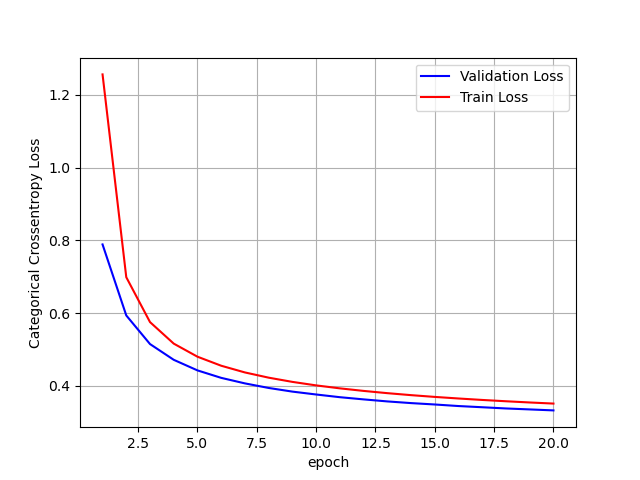

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## MLP + Sigmoid activation + SGDoptimizer

In [ ]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))  # Here there are 512 neurons
model_sigmoid.add(Dense(128, activation='sigmoid'))                            # Here there are 128 neurons
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy',f1_m])
history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 2.2633 - accuracy: 0.2473 - f1_m: 0.0000e+00 - val_loss: 2.2149 - val_accuracy: 0.2951 - val_f1_m: 0.0000e+00
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 2.1678 - accuracy: 0.4489 - f1_m: 0.0000e+00 - val_loss: 2.1101 - val_accuracy: 0.5357 - val_f1_m: 0.0000e+00
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 2.0450 - accuracy: 0.5555 - f1_m: 0.0000e+00 - val_loss: 1.9620 - val_accuracy: 0.6215 - val_f1_m: 0.0000e+00
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 1.8730 - accuracy: 0.6173 - f1_m: 0.0012 - val_loss: 1.7615 - val_accuracy: 0.6283 - val_f1_m: 0.0068
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 1.6567 - accuracy: 0.6608 - f1_m: 0.0404 - val_loss: 1.5281 - val_accuracy: 0.6968 - val_f1_m: 0.0738
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 1.4286 - accuracy: 0.7

#### Categorical crossentropy :
- We check how different is an instance as compared to another for a classification task.
- The categorical crossentropy is well suited to classification tasks, since one example can be considered to belong to a specific category with probability 1, and to other categories with probability 0.

#### Result summary:
- Optimizer = 'sgd' ,
- Input activation function = 'sigmoid',
- Output activation function = 'softmax' ,
- Model accuracy = 98.29
- F1 score = 98.32%

Test score: 0.4637114405632019
Test accuracy: 0.8773000240325928


<IPython.core.display.Javascript object>


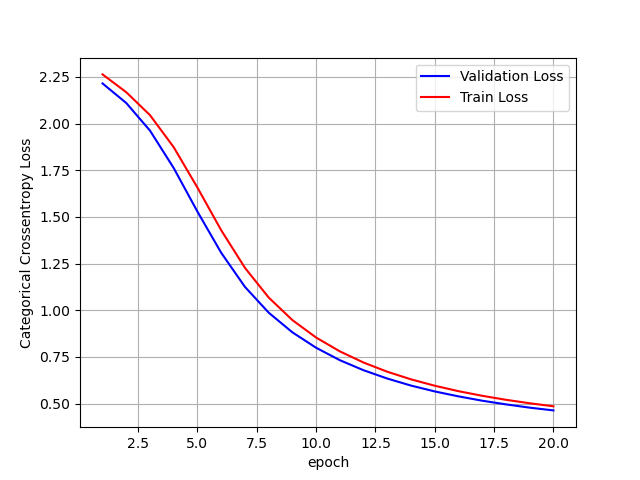

In [ ]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Violin plot:
- A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.



<IPython.core.display.Javascript object>


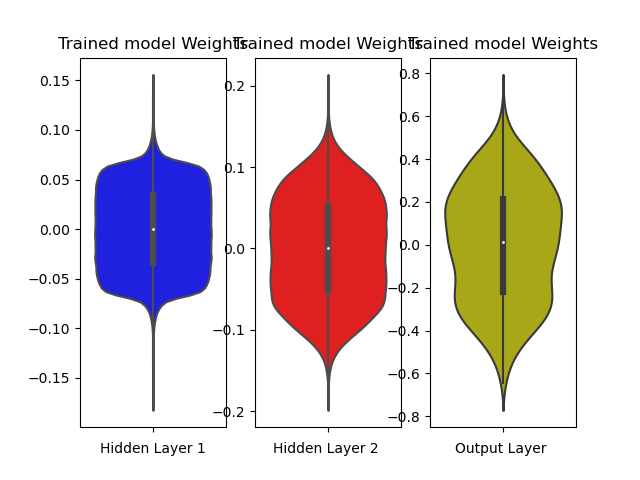

In [ ]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

##  MLP + Sigmoid activation + ADAM

In [ ]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_m])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.5283 - accuracy: 0.8614 - f1_m: 0.8010 - val_loss: 0.2483 - val_accuracy: 0.9292 - val_f1_m: 0.9290
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2203 - accuracy: 0.9356 - f1_m: 0.9366 - val_loss: 0.2003 - val_accuracy: 0.9398 - val_f1_m: 0.9416
Epoch 3/20
469/469 [========

#### Summary:
- Optimizer = 'adam' , 
- input activation function = 'sigmoid', 
- output activation function = 'softmax' , 
- Model accuracy = 98.28%
- F1 score = 98.31% 

Test score: 0.07061566412448883
Test accuracy: 0.9818000197410583


<IPython.core.display.Javascript object>


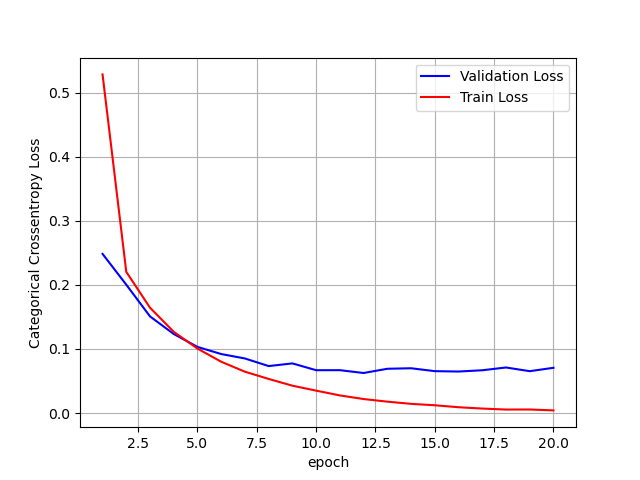

In [ ]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


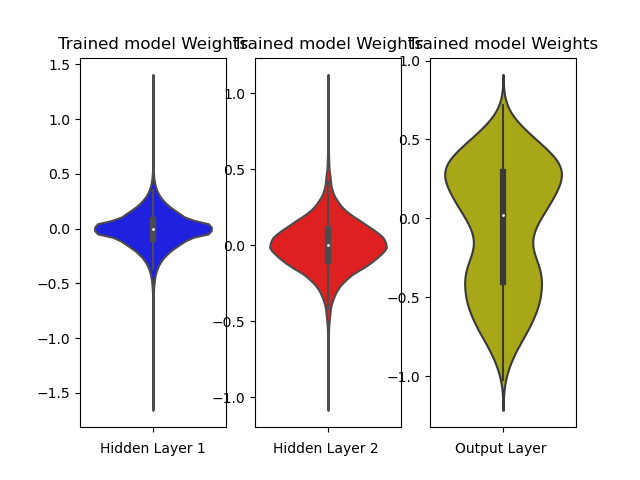

In [ ]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + ReLU +SGD

In [ ]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy', f1_m])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.7092 - accuracy: 0.8001 - f1_m: 0.7308 - val_loss: 0.3691 - val_accuracy: 0.9013 - val_f1_m: 0.8948
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3426 - accuracy: 0.9033 - f1_m: 0.9016 - val_loss: 0.2937 - val_accuracy: 0.9185 - val_f1_m: 0.9184
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2838 - accuracy: 0.9185 - f1_m: 0.9196 - val_loss: 0.2544 - val_accuracy: 0.9268 - val_f1_m: 0.9270
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2507 - accuracy: 0.9291 - f1_m: 0.9295 - val_loss: 0.2308 - val_accuracy: 0.9348 - val_f1_m: 0.9360
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2275 - accuracy: 0.9354 - f1_m: 0.9359 - val_loss: 0.2141 - val_accuracy: 0.9382 - val_f1_m: 0.9387
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2093 - accuracy: 0.9411 - f1_m: 0.9412 - val

#### Summary:
- Optimizer = 'sgd' ,
- input activation function = 'relu',
- output activation function = 'softmax' ,
- Model accuracy = 98.44%
- F1 score = 98.47%

Test score: 0.12274359166622162
Test accuracy: 0.9627000093460083


<IPython.core.display.Javascript object>


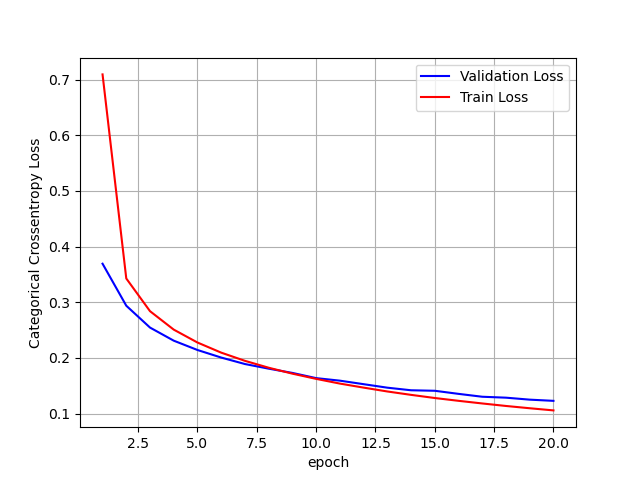

In [ ]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


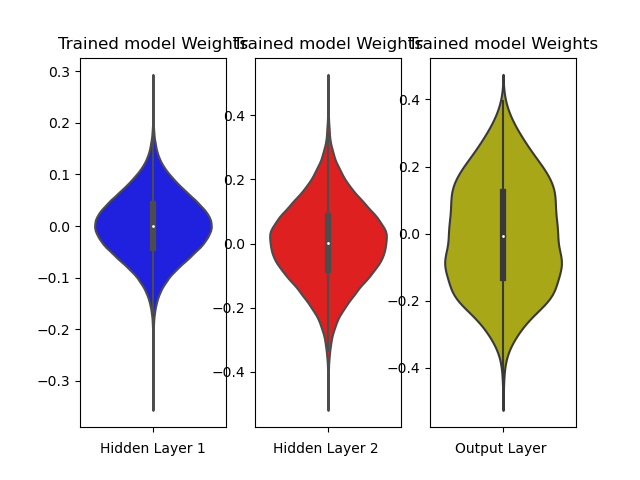

In [ ]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + ReLU + ADAM

In [ ]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1_m])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.2256 - accuracy: 0.9320 - f1_m: 0.9280 - val_loss: 0.1087 - val_accuracy: 0.9657 - val_f1_m: 0.9665
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0827 - accuracy: 0.9746 - f1_m: 0.9751 - val_loss: 0.0937 - val_accuracy: 0.9703 - val_f1_m: 0.9709
Epoch 3/20
469/469 [===

#### Summary:
- Optimizer = 'adam' ,
- input activation function = 'relu',
- output activation function = 'softmax' ,
- Model accuracy = 98.01%
- F1 score = 98.06%

Test score: 0.10584677755832672
Test accuracy: 0.98089998960495


<IPython.core.display.Javascript object>


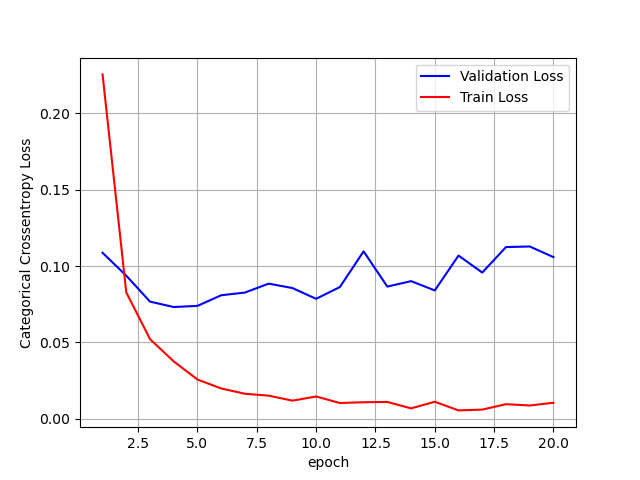

In [ ]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


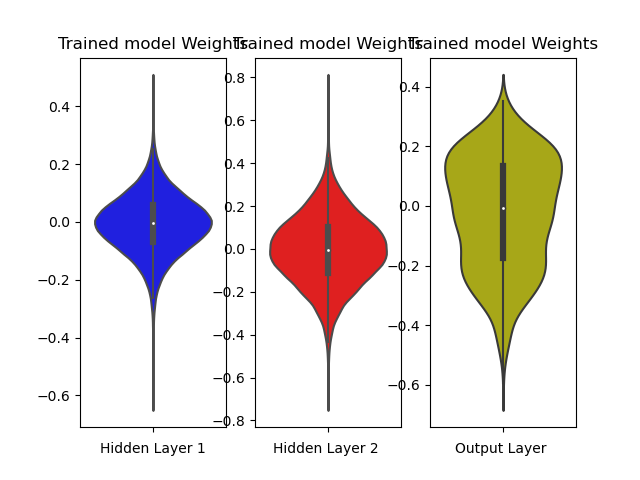

In [ ]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [ ]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [ ]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1_m])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3039 - accuracy: 0.9105 - f1_m: 0.9111 - val_loss: 0.2113 - val_accuracy: 0.9399 - val_f1_m: 0.9410
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1758 - accuracy: 0.9483 - f1_m: 0.9493 - val_loss: 0.1634 - val_accuracy: 0.9517 - val_f1_m: 0.9530
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1383 - accuracy: 0.9587 - f1_m: 0.9594 - val_loss: 0.1411 - val_accuracy: 0.9578 - val_f1_m: 0.9585
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1131 - accuracy: 0.9661 - f1_m: 0.9669 - val_loss: 0.1355 - val_accuracy: 0.9597 - val_f1_m: 0.9606
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0956 - accuracy: 0.9710 - f1_m: 0.9712 - val_loss: 0.1233 - val_accuracy: 0.9640 - val_f1_m: 0.9651
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0813 - accuracy: 0.9752 - f1_m: 0.9756 - val

#### Summary:
- Optimizer = 'adam' ,
- input activation function = 'sigmoid',
- output activation function = 'softmax' ,
- Model accuracy = 97.81%
- F1 score = 97.82%

Test score: 0.096511110663414
Test accuracy: 0.9745000004768372


<IPython.core.display.Javascript object>


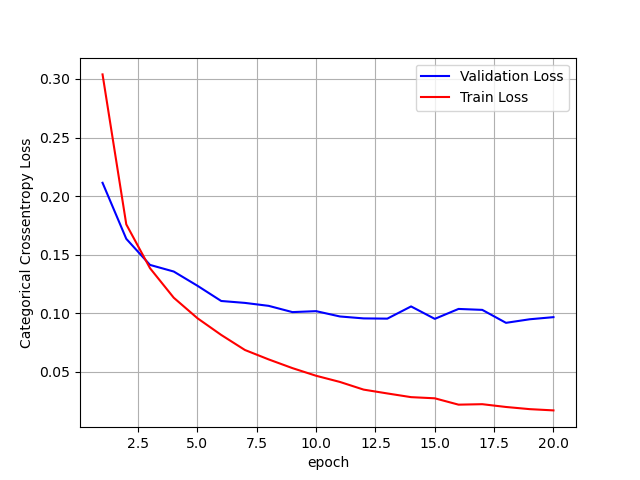

In [ ]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


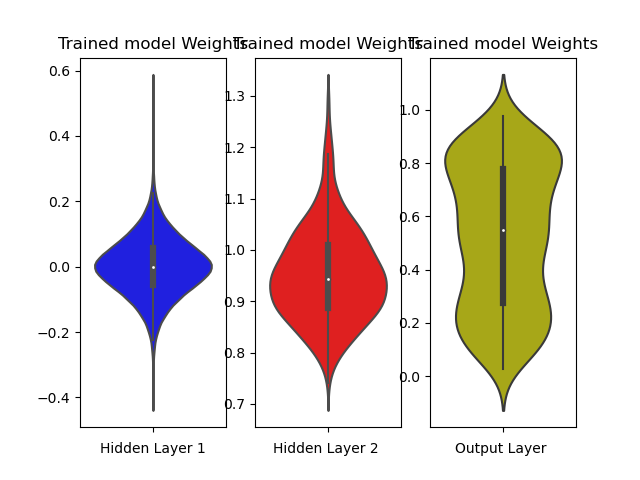

In [ ]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + Dropout + AdamOptimizer

In [ ]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from tensorflow.keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [ ]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_m])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 6s 9ms/step - loss: 0.6775 - accuracy: 0.7905 - f1_m: 0.7894 - val_loss: 0.2895 - val_accuracy: 0.9157 - val_f1_m: 0.9173
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4330 - accuracy: 0.8676 - f1_m: 0.8699 - val_loss: 0.2543 - val_accuracy: 0.9250 - val_f1_m: 0.9266
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3824 - accuracy: 0.8842 - f1_m: 0.8861 - val_loss: 0.2342 - val_accuracy: 0.9316 - val_f1_m: 0.9325
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3497 - accuracy: 0.8939 - f1_m: 0.8954 - val_loss: 0.2264 - val_accuracy: 0.9344 - val_f1_m: 0.9364
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3380 - accuracy: 0.8981 - f1_m: 0.8997 - val_loss: 0.2131 - val_accuracy: 0.9380 - val_f1_m: 0.9397
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3199 - accuracy: 0.9037 - f1_m: 0.9050 - val

#### Summary:
- Optimizer = 'adam' ,
- input activation function = 'sigmoid',
- output activation function = 'softmax' ,
- dropout = 50%
- Model accuracy = 98.32%
- F1 score = 98.37%

Test score: 0.11020463705062866
Test accuracy: 0.9682999849319458


<IPython.core.display.Javascript object>


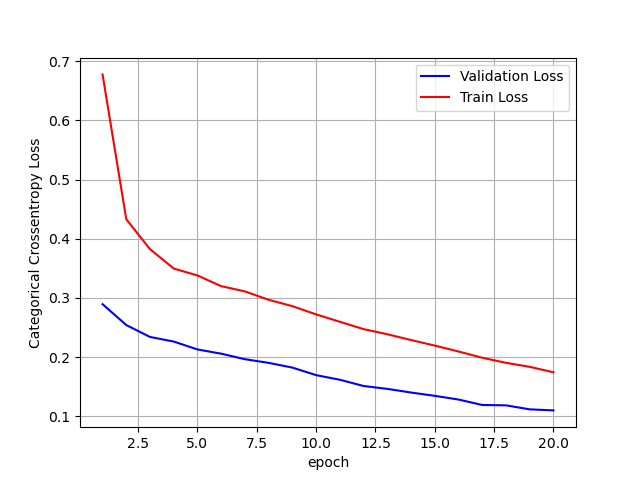

In [ ]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


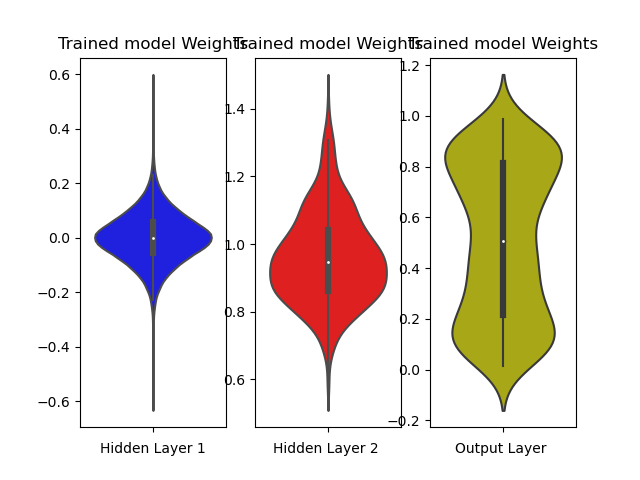

In [ ]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Hyper-parameter tuning of Keras models using Sklearn

In [16]:
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [ ]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                          verbose=20,  n_iter=10, n_jobs=1)
grid_result = grid.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] activ=sigmoid ...................................................
[CV] ....................... activ=sigmoid, score=0.979, total=  13.9s
[CV] activ=sigmoid ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.9s remaining:    0.0s


[CV] ....................... activ=sigmoid, score=0.976, total=  21.2s
[CV] activ=sigmoid ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   35.1s remaining:    0.0s


[CV] ....................... activ=sigmoid, score=0.976, total=  13.2s
[CV] activ=sigmoid ...................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   48.4s remaining:    0.0s


[CV] ....................... activ=sigmoid, score=0.974, total=  13.6s
[CV] activ=sigmoid ...................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.0min remaining:    0.0s


[CV] ....................... activ=sigmoid, score=0.980, total=  21.2s
[CV] activ=relu ......................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min remaining:    0.0s


[CV] .......................... activ=relu, score=0.978, total=  13.6s
[CV] activ=relu ......................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.6min remaining:    0.0s


There is a challenge to select proper hyperparameter. 
We need to choose proper learning rate, number of hidden layers, number of neurons in each layer, activation function.
- We can use RandomizedSearchCV or GridSearchCV for this
- GridSearchCV is computationally expensive as it checks each and every possibile values and apllies all types of combinations for our model. 
- Instead of using GridSearchCV, we can use RandomizedSearchCV as it checks by applying some random values and gives the best possible result in a specified range.

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

###Conclusion:

- Models' performance:
    - MLP + Sigmoid activation + SGDoptimizer :
        - Optimizer = 'sgd' ,
        - Input activation function = 'sigmoid',
        - Output activation function = 'softmax' ,
        - Model accuracy = 98.29
        - F1 score = 98.32%

    - MLP + Sigmoid activation + ADAM :
        - Optimizer = 'adam' , 
        - Input activation function = 'sigmoid', 
        - Output activation function = 'softmax' , 
        - Model accuracy = 98.28%
        - F1 score = 98.31% 

    - MLP + ReLU +SGD :
        - Optimizer = 'sgd' ,
        - Input activation function = 'relu',
        - Output activation function = 'softmax' ,
        - Model accuracy = 98.44%
        - F1 score = 98.47%

    - MLP + ReLU + ADAM :
        - Optimizer = 'adam' ,
        - input activation function = 'relu',
        - output activation function = 'softmax' ,
        - Model accuracy = 98.01%
        - F1 score = 98.06%

    - MLP + Batch-Norm on hidden Layers + Adam:
        - Optimizer = 'adam' ,
        - input activation function = 'sigmoid',
        - output activation function = 'softmax' ,
        - Model accuracy = 97.81%
        - F1 score = 97.82%

    - MLP + Dropout + Adam:
        - Optimizer = 'adam' ,
        - input activation function = 'sigmoid',
        - output activation function = 'softmax' ,
        - dropout = 50%
        - Model accuracy = 98.32%
        - F1 score = 98.37%

#### Model with Relu activation function and SGD optimizer gave the best result